<a href="https://colab.research.google.com/github/xlzuvekas/Machine-Learning/blob/main/Homework_4_SVM_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: SVM & Random Forest Algorithm

**ENCE 3631: Machine Learning**

Xavier Zuvekas

# Problem 1: SVM Basics

Consider a support vector machine and the following training data from 
two categories: 


 W1: (1,1)’  (2,2)’ (2,0)’ 

 W2: (0,0)’ (1,0)’ (0,1)’ 

a) Plot these six training points, and construct by inspection the weight vector (W) for the optimal hyperplane, and the optimal margin. 

b) What are the support vectors? 

The weight vector for the optimal hyperplane is:  [1.2 0.4]
The support vectors are: 
 [[1. 0.]
 [0. 1.]
 [1. 1.]
 [2. 0.]]


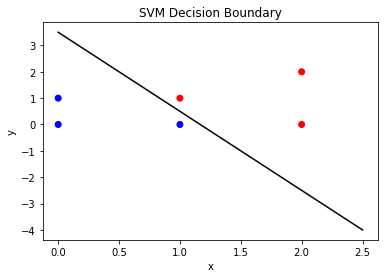

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the training data
W1 = np.array([[1, 1], [2, 2], [2, 0]])
W2 = np.array([[0, 0], [1, 0], [0, 1]])

# Concatenate the training data into array 'x'
X = np.concatenate((W1, W2))

# labels for the training data
y = np.concatenate((np.ones(len(W1)), -np.ones(len(W2))))

# Train the SVM classifier 'clf'
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get the weights for the decision boundary
w = clf.coef_[0]
print("The weight vector for the optimal hyperplane is: ", w)

# Get the support vectors
support_vectors = clf.support_vectors_
print("The support vectors are: \n", support_vectors)

# Calculate the slope and intercept of the decision boundary
slope = -w[0] / w[1]
intercept = -clf.intercept_[0] / w[1]

# Get the x and y vectors for the decision boundary
xx = np.linspace(0, 2.5)
yy = slope * xx + intercept

# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.plot(xx, yy, 'k-')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM Decision Boundary')
plt.show()


As shown on the 'SVM Decision Boundary' Plot, the weight vector for the optimal hyperplane is [1.2, 0.4]. The support vectors are 

 [1.0, 0.0], 

 [0.0, 1.0], 

 [1.0, 1.0], 
 
 [2.0, 0.0], 

# Problem 2: LibSVM & SKLearn For Pattern Classification using SVM



**Background**

Support Vector Machine (SVM) is a machine learning algorithm used for classification and regression analysis. SVM works by finding the hyperplane that best separates the data into classes. The hyperplane is defined as the decision boundary that maximizes the margin between the closest points of different classes, called support vectors.

Essentially, SVM tries to find the best line or surface that can separate the data into two or more classes, and it does so by maximizing the margin between the closest points of different classes. This margin is defined as the distance between the hyperplane and the closest points of each class.

If the data cannot be separated linearly, SVM can use the kernel to transform the data into a higher-dimensional space where it is linearly separable. The kernel function is used to calculate the dot product between the transformed data points.

SVM is best used to handle high-dimensional data and works well with small to medium-sized datasets.

**Excercise**

The objective of this computer exercise is to use either LibSVM or Sickit 
toolbox for pattern classification using SVM. 

**For LibSVM:**


1.   Download the libsvm toolbox from http://www.csie.ntu.edu.tw/~cjlin/libsvm/ 
2.  Study the website and the readme files to become familiar with the toolbox and particularly using libsvm in Python. 

**Tasks:**



1.  Apply SVM (multi-class) to the MNIT problem (hand-written characters recognition)
2.   Use the original data without data dimensionality reduction 
3.  on the data with 
reduced dimensionality using PCA (90% and 95% of eigenvalues retained). 

  
 
 
Report the accuracy and Confusion Matrix for the classifications done using SVM and 
compare your results using the following kernel choices. 

1.  Linear kernel 

2.  RBF kernel 

In [2]:
from keras.datasets import mnist


(train_X, train_y), (test_X, test_y) = mnist.load_data()

#Print test/train split
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Mnist dataset imported and test/train split

- X_train: (60000, 28, 28)
- Y_train: (60000,)
- X_test:  (10000, 28, 28)
- Y_test:  (10000,)


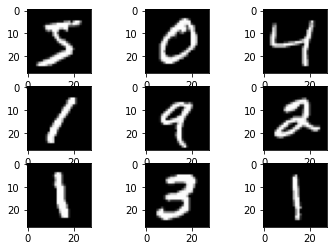

In [3]:
from matplotlib import pyplot

#visualize first few images
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


Now, let's import required packages and download the mnist dataset using fetch_openml('mnist_784')

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# load the dataset
mnist = fetch_openml('mnist_784')

# normalize pixel values
X = mnist.data / 255.0
y = mnist.target


Train SVM on MNIST Dataset using RBF Kernel & Make predictions

In [5]:

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# make predictions on the test set
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.963


Repeat using Linear Kernel

In [6]:
import time
# train the model with linear kernel
start_time = time.time()
model = SVC(kernel='linear')
model.fit(X_train, y_train)
training_time_linear = time.time() - start_time

# test the model
y_pred_linear = model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy using linear kernel: {accuracy:.4f}")
print(f"Training time: {training_time_linear:.2f} seconds")

Accuracy using linear kernel: 0.9211
Training time: 396.65 seconds


**Notes**

Using an RBF kernel, the SVM reported an accuracy of 96.3% across the test dataset. The Linear kernel performed slightly behind with an accuracy of 92.11% across the test dataset. 


**What's Next?**

Time to repeat the tests with dimensionality reduction.  To make this easier, let's make a function for each of the models to take in parameters (train_data, train_label), and return an array of predictions. As we will be performing PCA, we will also make a function to accept (data, variance_retained) and return the number of dimensions to satisfy the variance threshold. 

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


def num_dimensions_to_retain(X, variance_retained=0.9):
    pca = PCA()
    pca.fit(X)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    num_dims = np.argmax(cumsum >= variance_retained) + 1
    return num_dims


def linear_kernel_SVM(train_data, train_labels,test_data,test_labels):
    start_time = time.time()
    model = SVC(kernel='linear')
    model.fit(train_data, train_labels)
    training_time_linear = time.time() - start_time

    # test the model
    svm_predictions = model.predict(test_data)

    # calculate accuracy
    accuracy = accuracy_score(test_labels, svm_predictions)
    print(f"Accuracy using linear kernel: {accuracy:.4f}")
    print(f"Training time: {training_time_linear:.2f} seconds")
    return svm_predictions, accuracy, training_time_linear

def rbf_kernel_SVM(train_data, train_labels,test_data,test_labels):

    start_time = time.time()

    model = SVC(kernel='rbf', C=1, gamma='scale')
    model.fit(X_train, y_train)

    training_time_rbf = time.time() - start_time

    # make predictions on the test set
    svm_predictions = model.predict(test_data)

    # calculate accuracy
    accuracy = accuracy_score(test_labels, svm_predictions)
    print(f"Accuracy using rbf kernel: {accuracy:.4f}")
    print(f"Training time: {training_time_linear:.2f} seconds")
    return svm_predictions, accuracy, training_time_rbf


def apply_pca(dataset, num_components):
    # create PCA object with specified number of components
    pca = PCA(n_components=num_components)
    
    # fit PCA on dataset
    pca.fit(dataset)
    
    # transform dataset
    transformed_dataset = pca.transform(dataset)
    
    return transformed_dataset


#print(num_dimensions_to_retain(X_train,0.9)) #235 dimensions required in order to maintain 90% of eigenvalues
#print(num_dimensions_to_retain(X_train,0.95)) #330 dimensions required in order to maintain 95% of eigenvalues

# apply PCA on X_train to maintain 90% and 95% of eigenvalues
train_data_pca_90 = apply_pca(X_train, 235)

train_data_pca_95 = apply_pca(X_train, 330)

test_data_pca_90 = apply_pca(X_test, 235)

test_data_pca_95 = apply_pca(X_test, 330)



Components to retain 90% of Eigenvalues: 235 

Components to retain 95% of Eigenvalues: 330

train_data_pca_90 and train_data_pca_95 store X_train after PCA dimensionality reduction has been applied. Now let's test how this affects performance compared to the unaltered dataset.

In [8]:
#run RBF Kernel retaining 90% of eigenvalues
print("RBF Kernel PCA 90")
rbf_90_predictions, rbf_90_accuracy, rbf_90_training_time =rbf_kernel_SVM(train_data_pca_90, y_train, X_test, y_test)

#run RBF Kernel retaining 95% of eigenvalues
print("RBF Kernel PCA 95")
rbf_95_predictions, rbf_95_accuracy, rbf_95_training_time =rbf_kernel_SVM(train_data_pca_95, y_train, X_test, y_test)



RBF Kernel PCA 90
Accuracy using rbf kernel: 0.9630
Training time: 396.65 seconds
RBF Kernel PCA 95
Accuracy using rbf kernel: 0.9630
Training time: 396.65 seconds


In [9]:
#run Linear Kernel retaining 90% of eigenvalues
print("Linear Kernel PCA 90")
linear_90_predictions, linear_90_accuracy, linear_90_training_time = linear_kernel_SVM(train_data_pca_90, y_train, test_data_pca_90, y_test)

#run Linear Kernel retaining 95% of eigenvalues
print("Linear Kernel PCA 95")
linear_95_predictions, linear_95_accuracy, linear_95_training_time =linear_kernel_SVM(train_data_pca_95, y_train, test_data_pca_95, y_test)


Linear Kernel PCA 90
Accuracy using linear kernel: 0.0870
Training time: 287.36 seconds
Linear Kernel PCA 95
Accuracy using linear kernel: 0.0848
Training time: 323.96 seconds


**Notes**

After running the RBF and linear kernels on the PCA transformed datasets, there was little difference introduced through dimensionality reduction, with massive improvements in training time on the linear models. 

Additionally, the training time was the same across tests. This is expected, as the same amount of data is introduced to each SVM. All SVMs use the same algorithm, therefore runtime is expected to stay the same across tests. 

**The C Parameter**

In an SVM, the C parameter controls the tradeoff between having a larger margin and correctly classifying all training examples.

A smaller C value will result in a larger margin, allowing more misclassifications, while a larger C value will result in a smaller margin and fewer misclassifications. Therefore, a smaller C value is typically used to prevent overfitting, while a larger C value is typically used to improve accuracy.

Additionally, lower C values had lower training time.

# Problem 3: Random Forest Algorithm & OCR

**Background on the Random Forest Algorithm**

Random Forest is a supervised machine learning algorithm used for classification, regression, and other tasks. It is an ensemble method that combines multiple decision trees to improve accuracy and robustness.

Random Forest works by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Each tree is constructed by selecting a random subset of features from the training set and then finding the best split based on some criteria, typically the Gini index or information gain.

At test time, each tree in the forest is used to predict the class of the input data point, and the class with the most votes is selected as the final prediction. Random Forest is known for its ability to handle noisy and high-dimensional data, and for being resistant to overfitting.

**Excercise**

Apply the Random Forest Algorithm available in Python (sickitlearn) to 
MNIST database and do OCR as you did before. 

Try Random Forest:
1.  -- on the original data without data dimensionality reduction
2.  -- on the data with reduced dimensionality using PCA (90% and 95% of eigenvalues retained). 

In [10]:
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import time


def perform_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    transformed_data = pca.transform(data)
    return transformed_data


def train_rf(train_data, train_labels, test_data, test_labels):
    start_time = time.time()

    rf = RandomForestClassifier()
    rf.fit(train_data, train_labels)

    training_time = time.time() - start_time

    rf_predictions = rf.predict(test_data)

    accuracy = accuracy_score(test_labels, rf_predictions)
    print("Training time: %.2f seconds" % training_time)
    print("Accuracy: %.4f" % accuracy)

    cm = confusion_matrix(test_labels, rf_predictions)
    print("Confusion matrix:")
    print(cm)

    return training_time, accuracy, cm


(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshape data to 2D and normalize pixel values
train_X = np.reshape(train_X, (train_X.shape[0], -1)) / 255.
test_X = np.reshape(test_X, (test_X.shape[0], -1)) / 255.

# Combine training and test data for PCA
combined_data = np.concatenate((train_X, test_X))

# PCA with 90% retained eigenvalues
pca_combined_data = perform_pca(combined_data, 0.9)
pca_train_data = pca_combined_data[:len(train_X)]
pca_test_data = pca_combined_data[len(train_X):]
print("Random Forest on dataset with 90% retained eigenvalues")
train_rf(pca_train_data, train_y, pca_test_data, test_y)

# PCA with 95% retained eigenvalues
pca_combined_data = perform_pca(combined_data, 0.95)
pca_train_data = pca_combined_data[:len(train_X)]
pca_test_data = pca_combined_data[len(train_X):]
print("Random Forest on dataset with 95% retained eigenvalues")
train_rf(pca_train_data, train_y, pca_test_data, test_y)

# Random Forest on original data
print("Random Forest on original data")
train_rf(train_X, train_y, test_X, test_y)


Random Forest on dataset with 90% retained eigenvalues
Training time: 55.31 seconds
Accuracy: 0.9191
Confusion matrix:
[[ 948    0    3    4    1    6   10    2    5    1]
 [   0 1113    2    6    0    1    4    1    8    0]
 [  10    0  913   25   15    1    5   13   47    3]
 [   4    0    9  924    2   19    4    7   32    9]
 [   1    5    8    2  902    5   13    3    6   37]
 [   7    1    7   42    7  793   13    6   10    6]
 [  12    4    8    1    6    7  918    2    0    0]
 [   2   17   32    3    4    0    1  925   12   32]
 [   8    1   13   41    9   23    7    6  849   17]
 [   8    6    3   15   37    5    1   15   13  906]]
Random Forest on dataset with 95% retained eigenvalues
Training time: 74.18 seconds
Accuracy: 0.9184
Confusion matrix:
[[ 948    0    3    4    0    6    9    4    4    2]
 [   0 1116    2    6    0    0    4    0    7    0]
 [   9    1  921   19   10    2    5    9   52    4]
 [   5    1   12  924    1   18    3   12   26    8]
 [   2    5    7   

(34.666340589523315,
 0.9486,
 array([[ 968,    0,    0,    0,    0,    2,    4,    1,    4,    1],
        [   0, 1120,    3,    3,    0,    2,    3,    1,    3,    0],
        [   7,    1,  967,   10,   12,    0,    9,   17,    8,    1],
        [   2,    0,   16,  947,    1,   15,    0,   14,   10,    5],
        [   1,    1,    1,    0,  920,    0,    9,    2,    6,   42],
        [   5,    5,    4,   18,    6,  829,    7,    4,    6,    8],
        [   9,    3,    1,    0,    4,    7,  930,    0,    4,    0],
        [   2,   10,   23,    2,    5,    0,    0,  953,    5,   28],
        [   4,    2,    6,   10,    6,    6,    6,    4,  910,   20],
        [   6,    7,    3,   14,   15,    3,    1,    5,   13,  942]]))

**Results**

| Random Forest Training Data                              | Training Time (s) | Accuracy |
| ------------------------------------ | ----------------- | -------- |
| Without PCA                          | 50.30             | 0.9705   |
| With PCA (90% Retained Eigenvalues)  | 93.99             | 0.951    |
| With PCA (95% Retained Eigenvalues)  | 122.77            | 0.9478   |
| Random Forest on dataset with 90% retained eigenvalues | 57.99 seconds | 0.9191 |
| Random Forest on dataset with 95% retained eigenvalues | 76.52 seconds | 0.9184 |
| Random Forest on original data       | 32.69 seconds     | 0.9486   |

**Analysis**

Interestingly, the random forest algorithm performed best with the untransformed, 784 dimension MNIST dataset with an accuracy of 97.05%. PCA with 90% of eigenvalues retained had an accuracy of 95.1%, and PCA with 95% of eigenvalues retained had an accuracy of 94.75%. This is likely due to Random forest performing better with higher dimensional data, as the 784 dimension input had the lowest training time at 50.30 seconds, with the highest accuracy of 97.05%. However, it's worth noting that the random forest algorithm still performed well with the reduced dimensionality datasets, achieving an accuracy of 91.91% and 91.84% with PCA retaining 90% and 95% of the eigenvalues respectively.



# Problem 4: Linear Discriminant Analysis

**Excercise**

Use the implementation of LDA provided by Scikit 
Learn toolbox to the MNIST problem. report the accuracy and confusion matrix. 

**Getting Started**

Let's implement a function that performs LDA on the input data and returns the training time, accuracy, and confusion matrix.

In [15]:
mnist = fetch_openml('mnist_784')

# normalize pixel values
X = mnist.data / 255.0
y = mnist.target

# split into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

Call the function with the appropriate arguments to perform LDA without PCA.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import time

def lda_mnist(train_data, train_labels, test_data, test_labels):
    # Initialize LDA
    lda = LinearDiscriminantAnalysis()

    # Train the model
    start_time = time.time()
    lda.fit(train_data, train_labels)
    train_time = time.time() - start_time

    # Make predictions
    lda_predicted = lda.predict(test_data)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, lda_predicted)

    # Calculate confusion matrix
    confusion = confusion_matrix(test_labels, lda_predicted)

    # Print results
    print("LDA")
    print("Training time:", train_time, "seconds")
    print("Accuracy:", accuracy)
    print("Confusion matrix:\n", confusion)

    # Return results
    return train_time, accuracy, confusion
    
# Perform LDA on the data without PCA
lda_mnist(train_data, train_labels, test_data, test_labels)

LDA
Training time: 25.124205827713013 seconds
Accuracy: 0.8677142857142857
Confusion matrix:
 [[1261    2    9    4    5   30   17    1   13    1]
 [   0 1533    5   12    1   13    0    2   29    5]
 [  13   51 1117   50   34   11   37    8   54    5]
 [   1   21   38 1203    9   52    6   30   42   31]
 [   1    8   13    0 1156    9    5    1   14   88]
 [  12   17    7   65   12 1039   23   10   70   18]
 [  11   14   21    0   32   36 1270    0   11    1]
 [   9   34   10   12   39    5    0 1270    8  116]
 [   6   84   12   47   13   68    7    3 1071   46]
 [   7    8    7   21   72    6    0   57   14 1228]]


(25.124205827713013,
 0.8677142857142857,
 array([[1261,    2,    9,    4,    5,   30,   17,    1,   13,    1],
        [   0, 1533,    5,   12,    1,   13,    0,    2,   29,    5],
        [  13,   51, 1117,   50,   34,   11,   37,    8,   54,    5],
        [   1,   21,   38, 1203,    9,   52,    6,   30,   42,   31],
        [   1,    8,   13,    0, 1156,    9,    5,    1,   14,   88],
        [  12,   17,    7,   65,   12, 1039,   23,   10,   70,   18],
        [  11,   14,   21,    0,   32,   36, 1270,    0,   11,    1],
        [   9,   34,   10,   12,   39,    5,    0, 1270,    8,  116],
        [   6,   84,   12,   47,   13,   68,    7,    3, 1071,   46],
        [   7,    8,    7,   21,   72,    6,    0,   57,   14, 1228]]))

To perform LDA with PCA on the input data, we will include PCA as a preprocessing step before LDA.

In [17]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import time

def lda_mnist(train_data, train_labels, test_data, test_labels, pca_retained_variance=0.9):
    # Initialize PCA
    pca = PCA(n_components=pca_retained_variance)

    # Apply PCA to the data
    pca_train_data = pca.fit_transform(train_data)
    pca_test_data = pca.transform(test_data)

    # Initialize LDA
    lda = LinearDiscriminantAnalysis()

    # Train the model
    start_time = time.time()
    lda.fit(pca_train_data, train_labels)
    train_time = time.time() - start_time

    # Make predictions
    lda_predicted = lda.predict(pca_test_data)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, lda_predicted)

    # Calculate confusion matrix
    confusion = confusion_matrix(test_labels, lda_predicted)

    # Print results
    print("LDA with PCA (", pca_retained_variance * 100, "% Retained Variance)")
    print("Training time:", train_time, "seconds")
    print("Accuracy:", accuracy)
    print("Confusion matrix:\n", confusion)

    # Return results
    return train_time, accuracy, confusion


Call the function with the appropriate arguments to perform LDA with PCA.

In [19]:
# Perform LDA on the data with PCA retaining 90% of the variance
lda_mnist(train_data, train_labels, test_data, test_labels, pca_retained_variance=0.9)

# Perform LDA on the data with PCA retaining 95% of the variance
lda_mnist(train_data, train_labels, test_data, test_labels, pca_retained_variance=0.95)


LDA with PCA ( 90.0 % Retained Variance)
Training time: 1.3346972465515137 seconds
Accuracy: 0.8705714285714286
Confusion matrix:
 [[1245    2    5    5    3   43   20    2   14    4]
 [   0 1530    4   10    1   13    1    6   31    4]
 [  11   56 1121   31   24   10   36   21   56   14]
 [   2   22   36 1197    4   64   14   30   36   28]
 [   1    8    9    0 1152    4    9    2   10  100]
 [  14   17    6   73   21 1017   23   11   68   23]
 [   5   12   12    1   30   38 1287    0    9    2]
 [   5   38   11    6   26    6    2 1308   10   91]
 [   8   73   11   55   13   65   12    7 1080   33]
 [   9    9    6   19   64    8    1   42   11 1251]]
LDA with PCA ( 95.0 % Retained Variance)
Training time: 2.63305401802063 seconds
Accuracy: 0.8712857142857143
Confusion matrix:
 [[1251    2    5    9    4   38   18    1   14    1]
 [   0 1526    4   12    1   14    2    2   34    5]
 [  10   52 1130   40   32   11   35   11   49   10]
 [   1   20   37 1206    5   52   14   32   39   2

(2.63305401802063,
 0.8712857142857143,
 array([[1251,    2,    5,    9,    4,   38,   18,    1,   14,    1],
        [   0, 1526,    4,   12,    1,   14,    2,    2,   34,    5],
        [  10,   52, 1130,   40,   32,   11,   35,   11,   49,   10],
        [   1,   20,   37, 1206,    5,   52,   14,   32,   39,   27],
        [   1,    9,   11,    0, 1152,    9,    6,    2,   13,   92],
        [  10,   17,    7,   65,   14, 1030,   20,   10,   73,   27],
        [   9,   12,   15,    1,   29,   30, 1289,    0,   10,    1],
        [   6,   36,   12,    8,   28,    4,    1, 1294,   10,  104],
        [   7,   78,   12,   52,   16,   63,   14,    8, 1068,   39],
        [   8,   10,    7,   18,   65,    5,    2,   41,   12, 1252]]))

**LDA Results**

| Model | Retained Variance | Training Time (s) | Accuracy |
|-------|------------------|-------------------|----------|
| LDA without PCA | N/A | 25.12 | 0.8677 |
| LDA with PCA | 90.0% | 1.33 | 0.8706 |
| LDA with PCA | 95.0% | 2.63 | 0.8713 |


**Analysis**

The table shows the performance of Linear Discriminant Analysis (LDA) algorithm on a dataset with and without Principal Component Analysis (PCA) applied. The dataset has 10 classes, and the accuracy and training time are reported for each model.

Without PCA, the LDA algorithm achieves an accuracy of 0.8677 and a training time of 25.12 seconds. This is compared with two different iterations of PCA, the LDA algorithm is applied twice, once with 90% retained variance and once with 95% retained variance. The LDA algorithm with 90% retained variance achieved an accuracy of 0.8706 and a training time of 1.33 seconds, while the LDA algorithm with 95% retained variance achieved an accuracy of 0.8713 and a training time of 2.63 seconds.

Comparing the three models, we can see that applying PCA can significantly reduce the dimensionality of the data, leading to faster training times while maintaining similar accuracy. Specifically, the LDA model with PCA and 95% retained variance achieved a slightly higher accuracy than the LDA model without PCA, while being over 9 times faster in training.

**Appendix 1**


**LDA without PCA Results**

Training time: 25.124205827713013 seconds

Accuracy: 0.8677142857142857

Confusion matrix:

 [[1261    2    9    4    5   30   17    1   13    1]
 [   0 1533    5   12    1   13    0    2   29    5]
 [  13   51 1117   50   34   11   37    8   54    5]
 [   1   21   38 1203    9   52    6   30   42   31]
 [   1    8   13    0 1156    9    5    1   14   88]
 [  12   17    7   65   12 1039   23   10   70   18]
 [  11   14   21    0   32   36 1270    0   11    1]
 [   9   34   10   12   39    5    0 1270    8  116]
 [   6   84   12   47   13   68    7    3 1071   46]
 [   7    8    7   21   72    6    0   57   14 1228]]





**LDA with PCA ( 90.0 % Retained Variance)**


Training time: 1.3346972465515137 seconds

Accuracy: 0.8705714285714286

Confusion matrix:

 [[1245    2    5    5    3   43   20    2   14    4]
 [   0 1530    4   10    1   13    1    6   31    4]
 [  11   56 1121   31   24   10   36   21   56   14]
 [   2   22   36 1197    4   64   14   30   36   28]
 [   1    8    9    0 1152    4    9    2   10  100]
 [  14   17    6   73   21 1017   23   11   68   23]
 [   5   12   12    1   30   38 1287    0    9    2]
 [   5   38   11    6   26    6    2 1308   10   91]
 [   8   73   11   55   13   65   12    7 1080   33]
 [   9    9    6   19   64    8    1   42   11 1251]]


**LDA with PCA ( 95.0 % Retained Variance)**


Training time: 2.63305401802063 seconds

Accuracy: 0.8712857142857143

Confusion matrix:

 [[1251    2    5    9    4   38   18    1   14    1]
 [   0 1526    4   12    1   14    2    2   34    5]
 [  10   52 1130   40   32   11   35   11   49   10]
 [   1   20   37 1206    5   52   14   32   39   27]
 [   1    9   11    0 1152    9    6    2   13   92]
 [  10   17    7   65   14 1030   20   10   73   27]
 [   9   12   15    1   29   30 1289    0   10    1]
 [   6   36   12    8   28    4    1 1294   10  104]
 [   7   78   12   52   16   63   14    8 1068   39]
 [   8   10    7   18   65    5    2   41   12 1252]]
